# PROYECTO PARCIAL DE ANALISIS EXPLORATORIO DE DATOS

## Importaciones 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de DataSets

En esta parte cargamos los datasets y añadimos las columnas extras necesarias:
  - conexiones --> dataset_final.csv
  - sitios --> ma_sitios.csv  --> Añadir columna de ubicacion basada en su latitud y longitud

###    Conexiones(Carga y Procesamiento)

In [2]:
conexiones = pd.DataFrame.from_csv("dataset_final.csv", sep = ",")
conexiones.head(3)

,datetime,codigo,pauta_id,sitio_id,mac_usr,ip_local,ip_usr,so,navegador,url_ref,tiempo_espera,fabricante-dispositivo
0,2015-05-15 20:16:35,1,11,2,94:01:C2:97:96:CB,10.5.8.1,10.5.10.95,Android,SAFARI,http://10.5.8.1/status,00:00:00,"Samsung Electronics Co.,Ltd"
1,2015-05-15 20:18:15,2,5,2,8C:BF:A6:17:60:A0,10.5.8.1,10.5.9.24,Android,CHROME,http://10.5.8.1/status,00:00:00,"Samsung Electronics Co.,Ltd"
2,2015-05-15 20:18:24,3,19,3,74:AA:FE:A5:7E:90,10.5.0.1,10.5.0.176,Android,CHROME,http://10.5.0.1/status,00:00:00,NaN


Se necesita parsear la columna datatime al formato correcto, y separaremos los valores en varias columnas

In [3]:
conexiones["datetime"] = pd.to_datetime(conexiones["datetime"])
conexiones["mes"] = conexiones["datetime"].dt.month
conexiones["año"] = conexiones["datetime"].dt.year
conexiones["hora"] = conexiones["datetime"].dt.hour
conexiones["fecha"] = conexiones["datetime"].dt.date
conexiones["weekday"] = conexiones["datetime"].dt.weekday
conexiones.head(2)

,datetime,codigo,pauta_id,sitio_id,mac_usr,ip_local,ip_usr,so,navegador,url_ref,tiempo_espera,fabricante-dispositivo,mes,año,hora,fecha,weekday
0,2015-05-15 20:16:35,1,11,2,94:01:C2:97:96:CB,10.5.8.1,10.5.10.95,Android,SAFARI,http://10.5.8.1/status,00:00:00,"Samsung Electronics Co.,Ltd",5,2015,20,2015-05-15,4
1,2015-05-15 20:18:15,2,5,2,8C:BF:A6:17:60:A0,10.5.8.1,10.5.9.24,Android,CHROME,http://10.5.8.1/status,00:00:00,"Samsung Electronics Co.,Ltd",5,2015,20,2015-05-15,4


Analizaremos algunos de los valores para ver que tenemos, en este caso, so, navegador y fabricante-dispositivo, seran objeto del analisis.

## SO 

In [4]:
conexiones["so"].value_counts()

Android          460233
iPhone           249829
iPad              14915
Nokia             13585
BlackBerry        10804
Windows10          6731
Windows7           6122
Mac                5947
Windows 8          5489
Windows 7          4785
Windows8           3118
Mac OS X           1974
WindowsXP          1071
Linux               461
WindowsV            165
Windows 10          136
Windows XP          111
Windows Vista        24
WindowsServer         4
Name: so, dtype: int64

Podemos observar que existen valores que podemos englobar en uno solo, para un mejor analisis.

### Categorizar SO 

In [5]:
def clasificadorSO(so):
    try:
        if so.lower().startswith("windows"):
            return "Windows"
        if so.lower() == "android":
            return "ANDROID"
        if so.lower() == "ipad" or so.lower() == "iphone" or so.lower() == "ios" or so.lower() == "mac" or so.lower() == "mac os x":
            return "iOS"
        if so.lower() == "linux":
            return "Other"
        return so
    except:
        return "Other"

In [6]:
conexiones["so"]  = conexiones["so"].apply(lambda x: clasificadorSO(x))
conexiones["so"].value_counts()

ANDROID       460233
iOS           272665
Windows        27756
Nokia          13585
Other          12826
BlackBerry     10804
Name: so, dtype: int64

# Navegador 

In [7]:
conexiones["navegador"].value_counts()

CHROME     373153
OTROS      166539
SAFARI     154120
OTHER       85851
IE           9551
FIREFOX      8641
OPERA          10
MOZILLA         4
Name: navegador, dtype: int64

Podemos observar que Other y Otros se refieren a lo mismo por lo tanto no deberia existir distincion.

### Categorizar Navegador

In [8]:
def clasificadorNavegador(navegador):
    try:
        if str(navegador.lower()) == "otros" or str(navegador.lower()) == "mozilla" or str(navegador.lower()) == "opera":
            return "OTHER"
        return navegador
    except:
        return "OTHER"

In [9]:
conexiones["navegador"] = conexiones["navegador"].apply(lambda x: clasificadorNavegador(x))
conexiones["navegador"].value_counts()

CHROME     373153
OTHER      252404
SAFARI     154120
IE           9551
FIREFOX      8641
Name: navegador, dtype: int64

## Fabricante 

In [10]:
conexiones["fabricante-dispositivo"].value_counts()

Apple                                                162076
Samsung Electronics Co.,Ltd                          146351
Sony Mobile Communications AB                         30163
Samsung Electro Mechanics co., LTD.                   27688
LG Electronics                                        27366
Nokia Corporation                                     19748
Samsung Elec Co.,Ltd                                  17908
Apple, Inc.                                           17630
Huawei Technologies Co., Ltd                          17333
Microsoft Corporation                                 16847
Murata Manufactuaring Co.,Ltd.                        13348
Samsung Electro Mechanics co.,LTD.                    11389
Motorola Mobility LLC                                 10840
Apple Inc                                             10020
Research In Motion                                     9721
Apple, Inc                                             9467
Hon Hai Precision Ind. Co.,Ltd.         

Se procedio a analizar en su totalidad todos los fabricantes y se tomo la decision en primera instancia obtener las dos primeras palabras de su nombre y ponerlas totalmente en mayusculas para ver el cambio.

## Clasificar Fabricantes 

In [11]:
def clasificarFabricantes(fabricante):
    try:
        fabricante = fabricante.replace(",","")
        fabricante = fabricante.replace(".","")
        fabricante = fabricante.replace("_","")
        fabricante = fabricante.replace("-","")
        palabras = fabricante.upper().split(" ")
        return palabras[0]
    except:
        return "OTHER"

In [12]:
prueba = conexiones.copy()
prueba["fab2"] = prueba["fabricante-dispositivo"].apply(lambda x: clasificarFabricantes(x))
prueba["fab2"].value_counts()

SAMSUNG        219638
APPLE          199193
OTHER          113379
LG              31348
SONY            30274
MURATA          27731
NOKIA           19901
HUAWEI          17441
MICROSOFT       17267
MOTOROLA        12900
RESEARCH        12506
TCT             12409
HON              9430
INPRO            9004
WISOL            8577
INTEL            8409
LITEON           6589
RIM              4875
HTC              4682
MEDIATEK         4350
ZTE              2869
HONGKONG         1532
TRENDNET         1512
GUANGZHOU        1389
DLINK            1376
CONSENTRY        1310
SHENZHEN          966
ARIMA             954
TINNO             892
ASKEY             885
                ...  
RPA                 1
DANIEL              1
VESTEL              1
INTERSOFT           1
NEOKOROS            1
MOVITA              1
PHAROS              1
TOMMY               1
CASTLENET           1
INFORMATION         1
HITACHI             1
MECALC              1
AIR                 1
DATACARD            1
ANYDATA   

Se pudo ver que se reducieron considerablemente la cantidad de fabricantes, pero siguen siendo muchos, se decidio agrupar los que solo aparecen una vez por lo tanto se mejoro la funcion de clasificarFabricante a una que reciba un diccionario con la cantidad de veces que aparece el fabricante en el dataset

In [13]:
def clasificarFabricantes2(dic, fabricante):
    if fabricante in dic:
        if dic[fabricante]["cant"] < 10000:
            return "OTHER"
    return fabricante

In [14]:
prueba2 = prueba.copy()
dic = prueba2["fab2"].value_counts().to_frame("cant").to_dict("index")
prueba2["fab2"] = prueba2["fab2"].apply(lambda x: clasificarFabricantes2(dic, x))
prueba2["fab2"].value_counts()

SAMSUNG      219638
APPLE        199193
OTHER        197261
LG            31348
SONY          30274
MURATA        27731
NOKIA         19901
HUAWEI        17441
MICROSOFT     17267
MOTOROLA      12900
RESEARCH      12506
TCT           12409
Name: fab2, dtype: int64

Se pudo reducir a 35 fabricantes lo que es un numero más manejable

## Ultimos manejos del Dataframe de conexiones 

In [15]:
conexiones = prueba2.copy()
conexiones.head(2)

,datetime,codigo,pauta_id,sitio_id,mac_usr,ip_local,ip_usr,so,navegador,url_ref,tiempo_espera,fabricante-dispositivo,mes,año,hora,fecha,weekday,fab2
0,2015-05-15 20:16:35,1,11,2,94:01:C2:97:96:CB,10.5.8.1,10.5.10.95,ANDROID,SAFARI,http://10.5.8.1/status,00:00:00,"Samsung Electronics Co.,Ltd",5,2015,20,2015-05-15,4,SAMSUNG
1,2015-05-15 20:18:15,2,5,2,8C:BF:A6:17:60:A0,10.5.8.1,10.5.9.24,ANDROID,CHROME,http://10.5.8.1/status,00:00:00,"Samsung Electronics Co.,Ltd",5,2015,20,2015-05-15,4,SAMSUNG


###  - Quitar Columnas no necesarias en el analisis

In [16]:
conexionesFinal = conexiones[["datetime","sitio_id", "mac_usr", "so", "navegador", "fabricante-dispositivo", "hora", "weekday", "fecha", "mes", "año", "fab2"]]
conexionesFinal.head(2)

,datetime,sitio_id,mac_usr,so,navegador,fabricante-dispositivo,hora,weekday,fecha,mes,año,fab2
0,2015-05-15 20:16:35,2,94:01:C2:97:96:CB,ANDROID,SAFARI,"Samsung Electronics Co.,Ltd",20,4,2015-05-15,5,2015,SAMSUNG
1,2015-05-15 20:18:15,2,8C:BF:A6:17:60:A0,ANDROID,CHROME,"Samsung Electronics Co.,Ltd",20,4,2015-05-15,5,2015,SAMSUNG


## Sitios 

In [17]:
sitios = pd.DataFrame.from_csv("ma_sitios2.csv", sep = ",").reset_index()
sitios.head(3)

,sitio_id,nombre,siglas,ruc,ciudad,nombre_ubicacion,contacto,direccion,email,telefono,...,transparencia,longitud,latitud,ip,puerto,fecha,usuario_modif,bienvenida,formulario,router
0,1,ALBAN BORJA,ALBAN BORJ,920124541001,Guayaquil,Guayaquil,Fabricio Matamoros,Av. Carlos Julio Arosemena,administracion@albanborja.com,923154211,...,0,-2.168677,-79.916769,186.3.137.95,NaN,2016-09-19 13:28:32,fmatamoros,0,0,Mikrotik
1,2,VILLAGE PLAZA,VILLA,0,Guayaquil,Guayaquil,Gabriela,SAMBORONDON,NaN,NaN,...,0,-2.140406,-79.866376,186.3.144.18,NaN,2016-07-20 17:23:50,fmatamoros,0,0,NaN
2,3,CITY MALL,CITY M.,0,Guayaquil,Guayaquil,Gabriela,Alborada,NaN,NaN,...,0,-2.140951,-79.911774,186.3.153.140,NaN,2015-12-22 10:21:54,fmatamoros,0,0,NaN


Como vemos contamos con latitud y longitud, para este analisis agregaremos una nueva columna llamada localizacion, en donde nos dara el lugar geografico donde se encuentra.

## Localizar Sitios 

Necesitaremos el boundingbox de los lugares el cual lo llamaremos places

In [18]:
places =[["Urdesa", [[-79.915581,-2.178119], [-79.901204,-2.146938]]],
             ["MallSur", [[-79.902062,-2.232042], [-79.894681,-2.226038]]],
             ["CityMall", [[-79.912663,-2.143936], [-79.905968,-2.137932]]],
             ["AlbanBorja", [[-79.918242,-2.170096], [-79.915066,-2.167523]]],
             ["Samborondon", [[-79.874897,-2.160447], [-79.852066,-2.116704]]],
             ["Aeropuerto", [[-79.886227,-2.152728], [-79.880562,-2.146338]]],
             ["Penias", [[-79.8776014239,-2.1855487464], [-79.873009,-2.175392]]],
             ["Quito", [[-78.586922,-0.395161], [-78.274155,0.021973]]],
             ["CentroConvenciones", [[-79.893479,-2.161755], [-79.883652,-2.154894]]],
             ["HiltonColon", [[-79.8998951912,-2.160929558], [-79.8962903023,-2.1576274229]]],
             ["MallSol", [[-79.8954641819,-2.157053837], [-79.8891341686,-2.1539258197]]],
             ["UniversidadGuayaquil", [[-79.9008607864,-2.1847947751], [-79.8959684372,-2.1791554991]]]
            ]

Funcion para localizar las coordenadas

In [19]:
def localizar(row, places):
    longitud = float(row["longitud"])
    latitud = float(row["latitud"])

    for placeName, ubicacion in places:
        SW, NE= ubicacion
        if (latitud <= NE[0] and longitud <=NE[1] and latitud >= SW[0] and longitud >= SW[1]):
            return placeName
    return "No ubicado"

In [20]:
sitios['localizacion'] = sitios[["longitud", "latitud"]].apply(lambda row: localizar(row, places), axis = 1)
sitios["localizacion"].value_counts()

CentroConvenciones      9
Quito                   8
Urdesa                  8
Samborondon             5
AlbanBorja              5
HiltonColon             2
Penias                  2
CityMall                1
Aeropuerto              1
UniversidadGuayaquil    1
MallSol                 1
MallSur                 1
Name: localizacion, dtype: int64

## Ultimos manejos del dataset sitios 

###       - Quitar columnas no necesarias para el analisis

In [21]:
sitios = sitios[["sitio_id","nombre", "longitud", "latitud", "localizacion"]]
sitios.head(3)

,sitio_id,nombre,longitud,latitud,localizacion
0,1,ALBAN BORJA,-2.168677,-79.916769,AlbanBorja
1,2,VILLAGE PLAZA,-2.140406,-79.866376,Samborondon
2,3,CITY MALL,-2.140951,-79.911774,CityMall


# UNIENDO LOS DATAFRAMES

In [22]:
datos = pd.merge(conexionesFinal, sitios, on = "sitio_id")
datos["hora"] = datos["hora"].apply(lambda x: str(x).rjust(2,"0") + "h")
datos.head(3)

,datetime,sitio_id,mac_usr,so,navegador,fabricante-dispositivo,hora,weekday,fecha,mes,año,fab2,nombre,longitud,latitud,localizacion
0,2015-05-15 20:16:35,2,94:01:C2:97:96:CB,ANDROID,SAFARI,"Samsung Electronics Co.,Ltd",20h,4,2015-05-15,5,2015,SAMSUNG,VILLAGE PLAZA,-2.140406,-79.866376,Samborondon
1,2015-05-15 20:18:15,2,8C:BF:A6:17:60:A0,ANDROID,CHROME,"Samsung Electronics Co.,Ltd",20h,4,2015-05-15,5,2015,SAMSUNG,VILLAGE PLAZA,-2.140406,-79.866376,Samborondon
2,2015-05-15 20:20:20,2,34:BE:00:05:16:18,ANDROID,SAFARI,"Samsung Electronics Co.,Ltd",20h,4,2015-05-15,5,2015,SAMSUNG,VILLAGE PLAZA,-2.140406,-79.866376,Samborondon


# ANALISIS #1.- Cantidad de Usuarios conectados por hora en un día

Necesitaremos la franja_horaria, la fecha, localizacion, mac_usr

In [23]:
dataAnalisis1 = datos.copy()[["fecha", "hora", "localizacion", "mac_usr"]]
dataAnalisis1.head(2)

,fecha,hora,localizacion,mac_usr
0,2015-05-15,20h,Samborondon,94:01:C2:97:96:CB
1,2015-05-15,20h,Samborondon,8C:BF:A6:17:60:A0


In [24]:
dataAnalisis1_Agrup = dataAnalisis1.groupby(["fecha", "hora", "localizacion"]).size().rename("cant_conexiones")
dataAnalisis1_Agrup

fecha       hora  localizacion
2015-05-15  20h   CityMall         11
                  Samborondon      21
            21h   AlbanBorja        2
                  CityMall         13
                  Samborondon      27
            22h   CityMall          6
                  Samborondon       8
            23h   CityMall          1
                  Quito             3
                  Samborondon       4
2015-05-16  00h   CityMall          1
                  Samborondon       2
            02h   Quito             2
            03h   Quito             2
            08h   Samborondon       3
            09h   Samborondon       1
            10h   AlbanBorja        2
                  CityMall          3
                  Samborondon       5
            11h   AlbanBorja        6
                  CityMall         14
                  Samborondon      19
            12h   AlbanBorja        4
                  CityMall         20
                  Samborondon      28
            13h   A

## Analisis general sin diferenciar la localizacion 

In [25]:
dataAnalisis1_1 = dataAnalisis1_Agrup.reset_index()
dataAnalisis1_1 = dataAnalisis1_1.groupby(["fecha", "hora"]).sum()
dataAnalisis1_1

cant_conexiones
fecha      hora                 
2015-05-15 20h                32
           21h                42
           22h                14
           23h                 8
2015-05-16 00h                 3
           02h                 2
           03h                 2
           08h                 3
           09h                 1
           10h                10
           11h                39
           12h                52
           13h                63
           14h                59
           15h                80
           16h                61
           17h                53
           18h                56
           19h                38
           20h                47
           21h                49
           22h                32
           23h                 8
2015-05-17 00h                 7
           01h                 3
           02h                 4
           03h                 2
           04h                 1
           07h                 1
           09h                 2
...                          ...
2016-09-26 12h                71
           13h               119
           14h                73
           15h                78
           16h               129
           17h               208
           18h                70
           19h                76
           20h                61
           21h                64
           22h                61
           23h                31
2016-09-27 00h                29
           01h                16
           02h                13
           03h                26
           04h                42
           05h                88
           06h                49
           07h                72
           08h                89
           09h                58
           10h                58
           11h                85
           12h                46
           13h                59
           14h                64
           15h                75
           16h               128
           17h               173

[11143 rows x 1 columns]

Sacando promedio de conexiones entre dias para cada franja horaria

In [26]:
dataAnalisis1_1 = dataAnalisis1_1.groupby(["hora"]).mean().add_prefix("mean_")
dataAnalisis1_1

,mean_cant_conexiones
hora,
00h,30.535865
01h,23.074661
02h,14.997579
03h,19.200000
04h,27.437158
05h,41.046512
06h,36.701531
07h,40.286031
08h,47.842975


### GRAFICANDO 

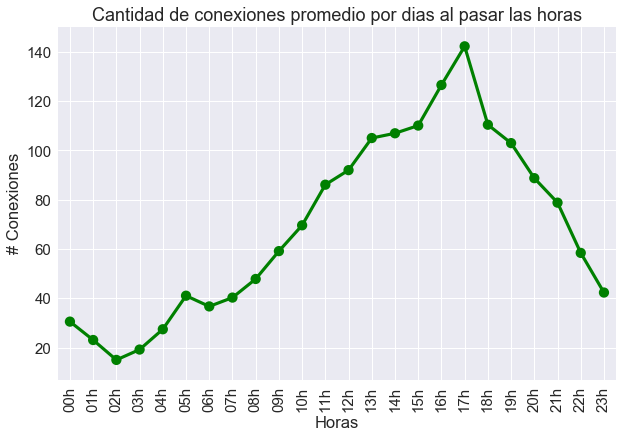

In [27]:
sns.set(font_scale=1.5)
g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=dataAnalisis1_1.reset_index(), color = "Green", size=6, aspect=1.5)
plt.xticks(rotation=90)
plt.xlabel("Horas")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio por dias al pasar las horas") 
plt.show()

## Analisis en base de la localizacion

In [28]:
dataLocalizacion =dataAnalisis1_Agrup.reset_index().copy()
def sacarMes(fecha):
    aux = str(fecha).split("-")
    return "-".join(aux[:2])

dataLocalizacion["mes"] = dataLocalizacion["fecha"].apply(lambda x: sacarMes(x))
dataLocalizacion = dataLocalizacion.groupby(["mes", "localizacion"]).sum().reset_index()
dataLocalizacion= dataLocalizacion.groupby("localizacion").mean().add_prefix("mean_")
dataLocalizacion = dataLocalizacion.reset_index().sort_values("mean_cant_conexiones", ascending = False).reset_index()
dataLocalizacion

,index,localizacion,mean_cant_conexiones
0,0,Aeropuerto,49237.000000
1,6,MallSur,15154.833333
2,3,CityMall,14407.833333
3,2,CentroConvenciones,11995.666667
4,9,Samborondon,5214.307692
5,11,Urdesa,2244.545455
6,5,MallSol,1849.750000
7,1,AlbanBorja,1460.294118
8,7,Penias,738.142857
9,4,HiltonColon,646.000000


## Graficando

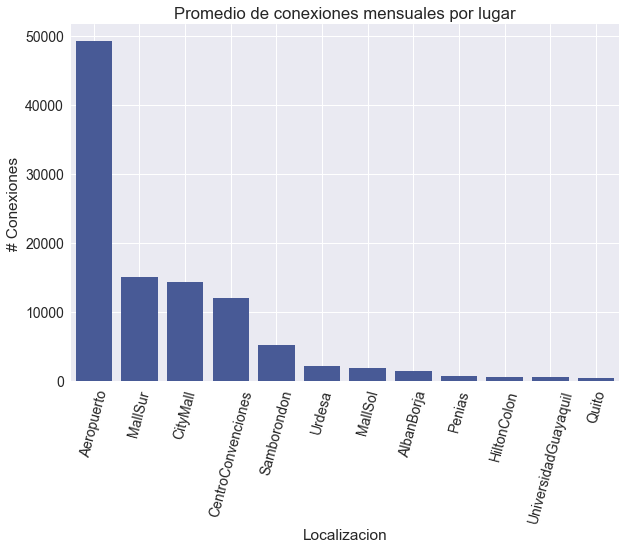

In [60]:
sns.set(font_scale=1.4)
cm = plt.cm.get_cmap('RdYlBu_r')
g = sns.factorplot(x="localizacion", y="mean_cant_conexiones", data=dataLocalizacion, color = cm(12), size=6, aspect=1.5, kind = "bar")
plt.xticks(rotation=75)
plt.xlabel("Localizacion")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Promedio de conexiones mensuales por lugar")
plt.savefig("C:\\Users\\Mercedes\\Desktop\\Galeria\\imagen.png")
plt.show()

### Agrupando lugares de pocas conexiones al mes 

Existen muchas localizaciones, se ha decidio mantener el top#5 y agregar una nueva categoria llamada OTHER a el resto de lugares.

In [30]:
top5 = dataLocalizacion[0:5].set_index("localizacion").to_dict("index")
top5

{'Aeropuerto': {'index': 0.0, 'mean_cant_conexiones': 49237.0},
 'CentroConvenciones': {'index': 2.0,
  'mean_cant_conexiones': 11995.666666666666},
 'CityMall': {'index': 3.0, 'mean_cant_conexiones': 14407.833333333334},
 'MallSur': {'index': 6.0, 'mean_cant_conexiones': 15154.833333333334},
 'Samborondon': {'index': 9.0, 'mean_cant_conexiones': 5214.3076923076924}}

In [31]:
def FiltrarLugares(top5, lugar):
    if lugar not in top5:
        return "OTHER"
    return lugar

In [32]:
dataLocalizacionFiltrada= dataLocalizacion.copy()
dataLocalizacionFiltrada["localizacion_filtrada"] = dataLocalizacionFiltrada["localizacion"].apply(lambda x: FiltrarLugares(top5, x))
dataLocalizacionFiltrada = dataLocalizacionFiltrada.groupby("localizacion_filtrada").sum().reset_index()
dataLocalizacionFiltrada = dataLocalizacionFiltrada.sort_values("mean_cant_conexiones", ascending = False).reset_index()
dataLocalizacionFiltrada

,level_0,localizacion_filtrada,index,mean_cant_conexiones
0,0,Aeropuerto,0,49237.000000
1,3,MallSur,6,15154.833333
2,2,CityMall,3,14407.833333
3,1,CentroConvenciones,2,11995.666667
4,4,OTHER,46,7963.024096
5,5,Samborondon,9,5214.307692


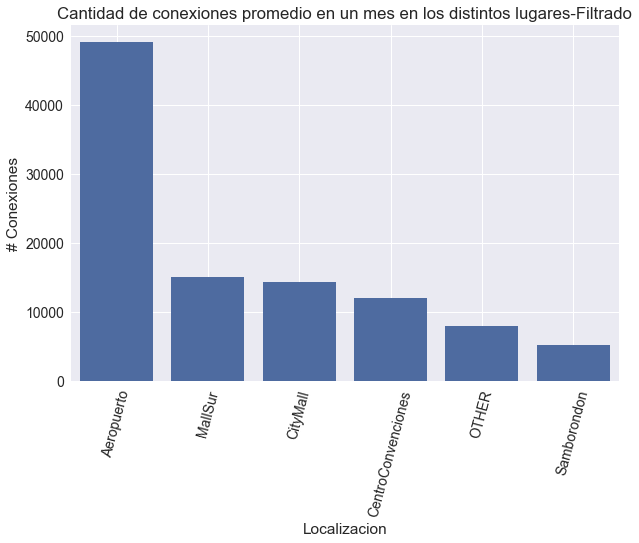

In [33]:
cm = plt.cm.get_cmap('RdYlBu_r')
g = sns.factorplot(x="localizacion_filtrada", y="mean_cant_conexiones", data=dataLocalizacionFiltrada, color = cm(20), size=6, aspect=1.5, kind = "bar")
plt.xticks(rotation=75)
plt.xlabel("Localizacion")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio en un mes en los distintos lugares-Filtrado") 
plt.show()

## Analisis especifico diferenciando por localizaciones 

In [34]:
dataAnalisis1_2 = dataAnalisis1.copy()
dataAnalisis1_2["localizacion_filtrada"] = dataAnalisis1_2["localizacion"].apply(lambda x: FiltrarLugares(top5, x))
dataAnalisis1_2 = dataAnalisis1_2.groupby(["localizacion_filtrada", "fecha", "hora"]).size().rename("cant_conexiones").reset_index()
dataAnalisis1_2 = dataAnalisis1_2.groupby(["localizacion_filtrada", "hora"]).mean().add_prefix("mean_").reset_index()
dataAnalisis1_2

,localizacion_filtrada,hora,mean_cant_conexiones
0,Aeropuerto,00h,52.598592
1,Aeropuerto,01h,38.241135
2,Aeropuerto,02h,22.464789
3,Aeropuerto,03h,40.161972
4,Aeropuerto,04h,63.387324
5,Aeropuerto,05h,93.992958
6,Aeropuerto,06h,94.711268
7,Aeropuerto,07h,111.633803
8,Aeropuerto,08h,113.154930
9,Aeropuerto,09h,107.769231


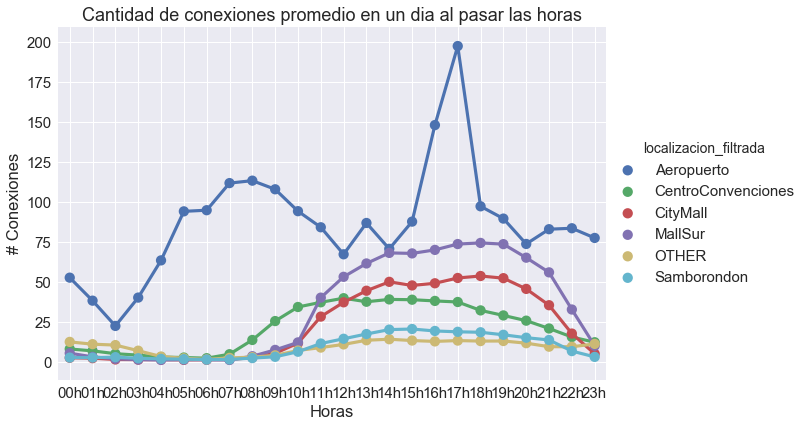

In [35]:
sns.set(font_scale=1.5)
g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=dataAnalisis1_2, size=6, aspect=1.5, hue = "localizacion_filtrada")
plt.xticks(rotation=0)
plt.xlabel("Horas")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio en un dia al pasar las horas") 
plt.show()

In [36]:
dataUnif = pd.merge(dataAnalisis1_1.reset_index().rename(columns={'hora': 'hora', 'mean_cant_conexiones': 'TODOS'}),
                    dataAnalisis1_2.pivot(index='hora', columns='localizacion_filtrada', values='mean_cant_conexiones').reset_index(),
                    on = "hora")
dataUnif = pd.melt(dataUnif, id_vars=['hora'], var_name='localizacion_filtrada', value_name='mean_cant_conexiones')
dataUnif

,hora,localizacion_filtrada,mean_cant_conexiones
0,00h,TODOS,30.535865
1,01h,TODOS,23.074661
2,02h,TODOS,14.997579
3,03h,TODOS,19.200000
4,04h,TODOS,27.437158
5,05h,TODOS,41.046512
6,06h,TODOS,36.701531
7,07h,TODOS,40.286031
8,08h,TODOS,47.842975
9,09h,TODOS,59.143149


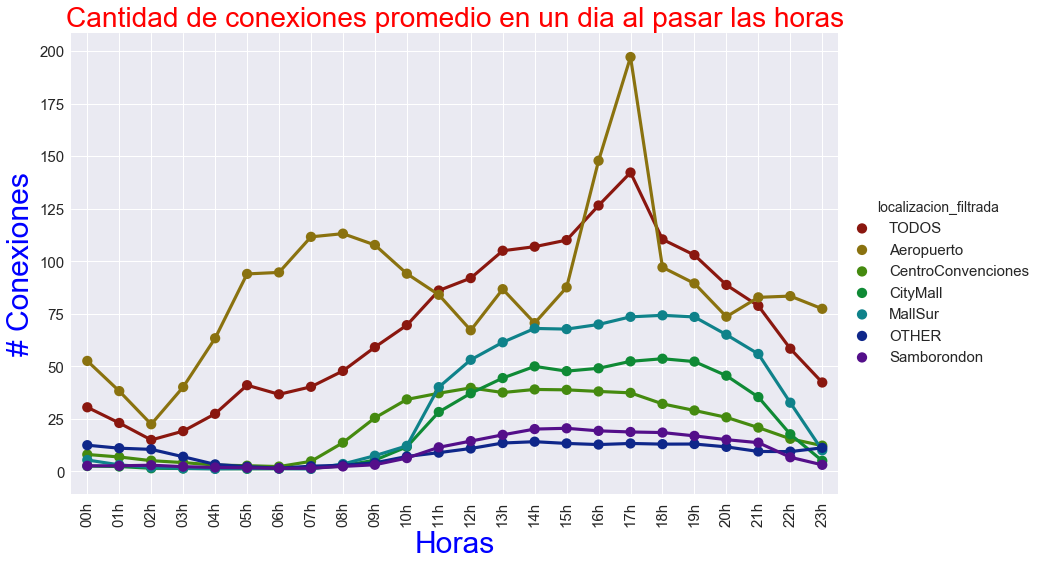

In [37]:
sns.set(font_scale=1.5)
g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=dataUnif, size=7.5, aspect=1.6, hue = "localizacion_filtrada", palette = sns.hls_palette(8, l=.3, s=.8))
plt.xticks(rotation=90)
plt.xlabel("Horas", color = "Blue", size = 30)
plt.ylabel("# Conexiones", color = "Blue", size = 30)
plt.grid(True)
plt.title("Cantidad de conexiones promedio en un dia al pasar las horas", color = "RED", size = 28) 
plt.show()

# ANALISIS #2.- Cantidad de Usuarios conectados en un mes por su SO, Navegador y Fabricante


In [38]:
dataAnalisis2 = datos.copy()[["fecha", "localizacion", "mac_usr", "so", "navegador", "fab2"]]
dataAnalisis2["mes"] = dataAnalisis2["fecha"].apply(lambda x: sacarMes(x))
dataAnalisis2["localizacion_filtrada"] = dataAnalisis2["localizacion"].apply(lambda x: FiltrarLugares(top5, x))

dataAnalisis2.head(2)

,fecha,localizacion,mac_usr,so,navegador,fab2,mes,localizacion_filtrada
0,2015-05-15,Samborondon,94:01:C2:97:96:CB,ANDROID,SAFARI,SAMSUNG,2015-05,Samborondon
1,2015-05-15,Samborondon,8C:BF:A6:17:60:A0,ANDROID,CHROME,SAMSUNG,2015-05,Samborondon


## -SO

In [39]:
dataAnalisis2SO = dataAnalisis2.groupby(["mes","so"]).size().rename("cant_conexiones").reset_index()
dataAnalisis2SO = dataAnalisis2SO.groupby(["so"]).mean().add_prefix("mean_").reset_index()
dataAnalisis2SO = dataAnalisis2SO.sort_values("mean_cant_conexiones", ascending = False).reset_index()
dataAnalisis2SO

,index,so,mean_cant_conexiones
0,0,ANDROID,27066.647059
1,5,iOS,16039.000000
2,4,Windows,1632.588235
3,2,Nokia,799.058824
4,3,Other,754.294118
5,1,BlackBerry,635.294118


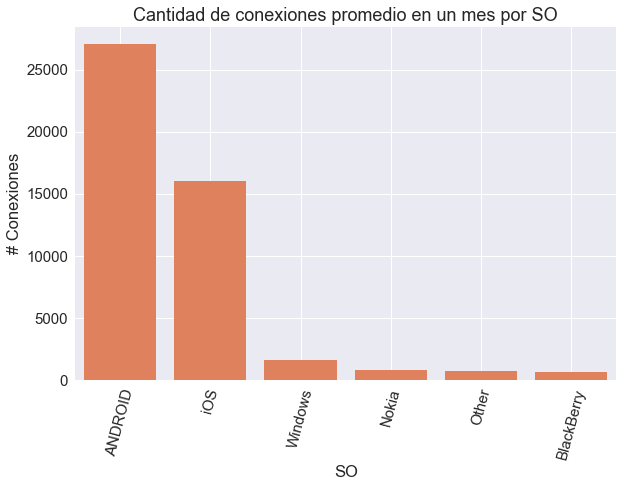

In [40]:
cm = plt.cm.get_cmap('RdYlBu_r')
g = sns.factorplot(x="so", y="mean_cant_conexiones", data=dataAnalisis2SO, color = cm(200), size=6, aspect=1.5, kind = "bar")
plt.xticks(rotation=75)
plt.xlabel("SO")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio en un mes por SO") 
plt.show()

In [41]:
dataAnalisis2SOLocalizacion = dataAnalisis2.groupby(["localizacion_filtrada","mes","so"]).size().rename("cant_conexiones").reset_index()
dataAnalisis2SOLocalizacion = dataAnalisis2SOLocalizacion.groupby(["localizacion_filtrada","so"]).mean().add_prefix("mean_").reset_index()
dataAnalisis2SOLocalizacion = dataAnalisis2SOLocalizacion.sort_values(["localizacion_filtrada","mean_cant_conexiones"], ascending = [True,False]).reset_index()
dataAnalisis2SOLocalizacion

,index,localizacion_filtrada,so,mean_cant_conexiones
0,5,Aeropuerto,iOS,25176.500000
1,0,Aeropuerto,ANDROID,21486.666667
2,4,Aeropuerto,Windows,2072.000000
3,2,Aeropuerto,Nokia,221.833333
4,3,Aeropuerto,Other,211.166667
5,1,Aeropuerto,BlackBerry,68.833333
6,6,CentroConvenciones,ANDROID,7006.200000
7,11,CentroConvenciones,iOS,4046.466667
8,10,CentroConvenciones,Windows,495.933333
9,9,CentroConvenciones,Other,287.600000


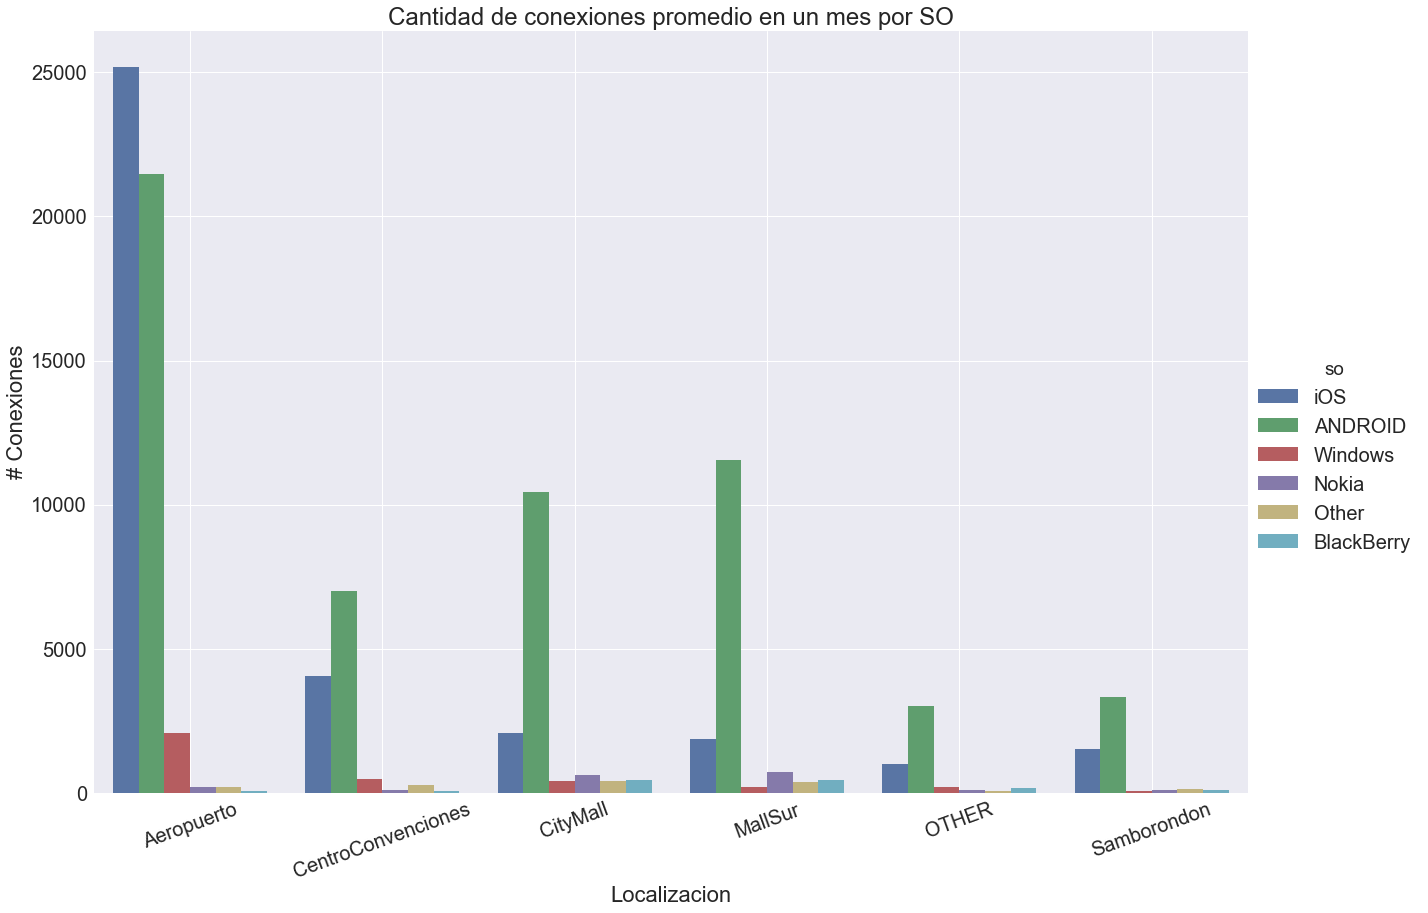

In [42]:
sns.set(font_scale=2)
cm = plt.cm.get_cmap('RdYlBu_r')
g = sns.factorplot(x="localizacion_filtrada", y="mean_cant_conexiones", data=dataAnalisis2SOLocalizacion, size=12, aspect=1.5, kind = "bar", hue = "so")
plt.xticks(rotation=20)
plt.xlabel("Localizacion")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio en un mes por SO") 
plt.show()

## -Navegador 

In [43]:
dataAnalisis2Nav = dataAnalisis2.groupby(["mes","navegador"]).size().rename("cant_conexiones").reset_index()
dataAnalisis2Nav = dataAnalisis2Nav.groupby(["navegador"]).mean().add_prefix("mean_").reset_index()
dataAnalisis2Nav = dataAnalisis2Nav.sort_values("mean_cant_conexiones", ascending = False).reset_index()
dataAnalisis2Nav

,index,navegador,mean_cant_conexiones
0,0,CHROME,21947.352941
1,3,OTHER,14847.117647
2,4,SAFARI,9062.588235
3,2,IE,561.705882
4,1,FIREFOX,508.117647


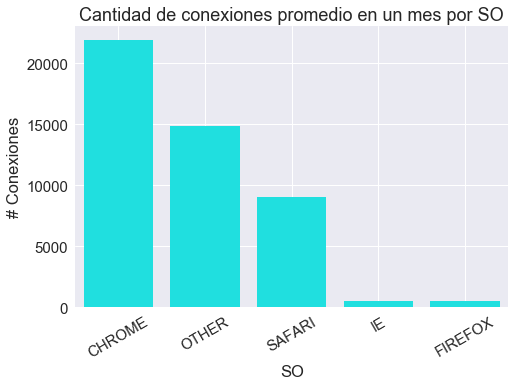

In [44]:
sns.set(font_scale=1.5)
cm = plt.cm.get_cmap('RdYlBu_r')
g = sns.factorplot(x="navegador", y="mean_cant_conexiones", data=dataAnalisis2Nav, color = "Cyan", size=5, aspect=1.5, kind = "bar")
plt.xticks(rotation=30)
plt.xlabel("SO")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio en un mes por SO") 
plt.show()

In [45]:
dataAnalisis2NavLocalizacion = dataAnalisis2.groupby(["localizacion_filtrada","mes","navegador"]).size().rename("cant_conexiones").reset_index()
dataAnalisis2NavLocalizacion = dataAnalisis2NavLocalizacion.groupby(["localizacion_filtrada","navegador"]).mean().add_prefix("mean_").reset_index()
dataAnalisis2NavLocalizacion = dataAnalisis2NavLocalizacion.sort_values(["localizacion_filtrada","mean_cant_conexiones"], ascending = [True,False]).reset_index()
dataAnalisis2NavLocalizacion

,index,localizacion_filtrada,navegador,mean_cant_conexiones
0,3,Aeropuerto,OTHER,24463.166667
1,0,Aeropuerto,CHROME,20196.166667
2,4,Aeropuerto,SAFARI,3850.000000
3,1,Aeropuerto,FIREFOX,480.000000
4,2,Aeropuerto,IE,247.666667
5,5,CentroConvenciones,CHROME,6183.466667
6,8,CentroConvenciones,OTHER,3449.000000
7,9,CentroConvenciones,SAFARI,2131.400000
8,6,CentroConvenciones,FIREFOX,138.800000
9,7,CentroConvenciones,IE,93.000000


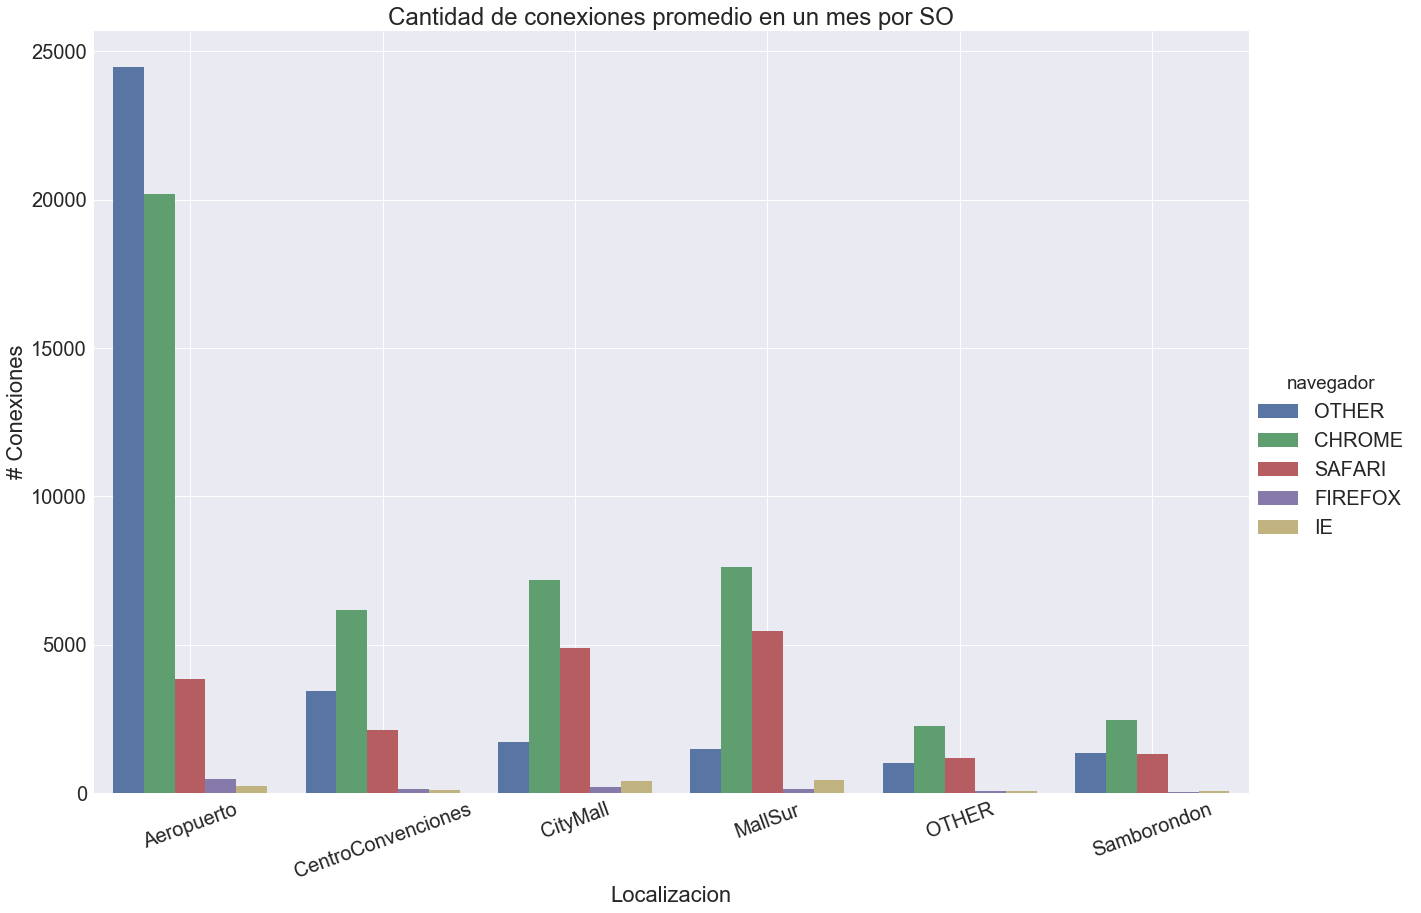

In [46]:
sns.set(font_scale=2)
cm = plt.cm.get_cmap('RdYlBu_r')
g = sns.factorplot(x="localizacion_filtrada", y="mean_cant_conexiones", data=dataAnalisis2NavLocalizacion, size=12, aspect=1.5, kind = "bar", hue = "navegador")
plt.xticks(rotation=20)
plt.xlabel("Localizacion")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio en un mes por SO") 
plt.show()

## -Fabricante

In [47]:
dataAnalisis2Fab = dataAnalisis2.groupby(["mes","fab2"]).size().rename("cant_conexiones").reset_index()
dataAnalisis2Fab = dataAnalisis2Fab.groupby(["fab2"]).mean().add_prefix("mean_").reset_index()
dataAnalisis2Fab = dataAnalisis2Fab.sort_values("mean_cant_conexiones", ascending = False).reset_index()
dataAnalisis2Fab

,index,fab2,mean_cant_conexiones
0,9,SAMSUNG,12916.176471
1,0,APPLE,11717.235294
2,7,OTHER,11602.058824
3,2,LG,1843.588235
4,10,SONY,1780.588235
5,5,MURATA,1631.000000
6,6,NOKIA,1170.588235
7,1,HUAWEI,1025.823529
8,3,MICROSOFT,1015.705882
9,4,MOTOROLA,758.823529


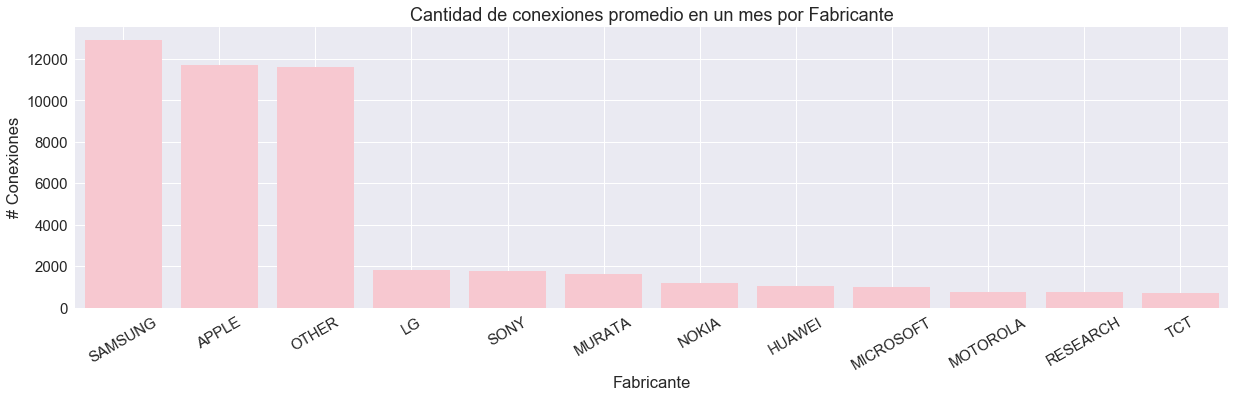

In [48]:
sns.set(font_scale=1.5)
cm = plt.cm.get_cmap('RdYlBu_r')
g = sns.factorplot(x="fab2", y="mean_cant_conexiones", data=dataAnalisis2Fab, color = "Pink", size=5, aspect=3.5, kind = "bar")
plt.xticks(rotation=30)
plt.xlabel("Fabricante")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio en un mes por Fabricante") 
plt.show()

In [49]:
dataAnalisis2FabLocalizacion = dataAnalisis2.groupby(["localizacion_filtrada","mes","fab2"]).size().rename("cant_conexiones").reset_index()
dataAnalisis2FabLocalizacion = dataAnalisis2FabLocalizacion.groupby(["localizacion_filtrada","fab2"]).mean().add_prefix("mean_").reset_index()
dataAnalisis2FabLocalizacion = dataAnalisis2FabLocalizacion.sort_values(["localizacion_filtrada","mean_cant_conexiones"], ascending = [True,False]).reset_index()
dataAnalisis2FabLocalizacion

,index,localizacion_filtrada,fab2,mean_cant_conexiones
0,7,Aeropuerto,OTHER,18219.833333
1,0,Aeropuerto,APPLE,17476.333333
2,9,Aeropuerto,SAMSUNG,7650.833333
3,5,Aeropuerto,MURATA,1678.833333
4,10,Aeropuerto,SONY,1134.333333
5,2,Aeropuerto,LG,983.000000
6,1,Aeropuerto,HUAWEI,499.333333
7,4,Aeropuerto,MOTOROLA,447.666667
8,3,Aeropuerto,MICROSOFT,447.500000
9,6,Aeropuerto,NOKIA,319.833333


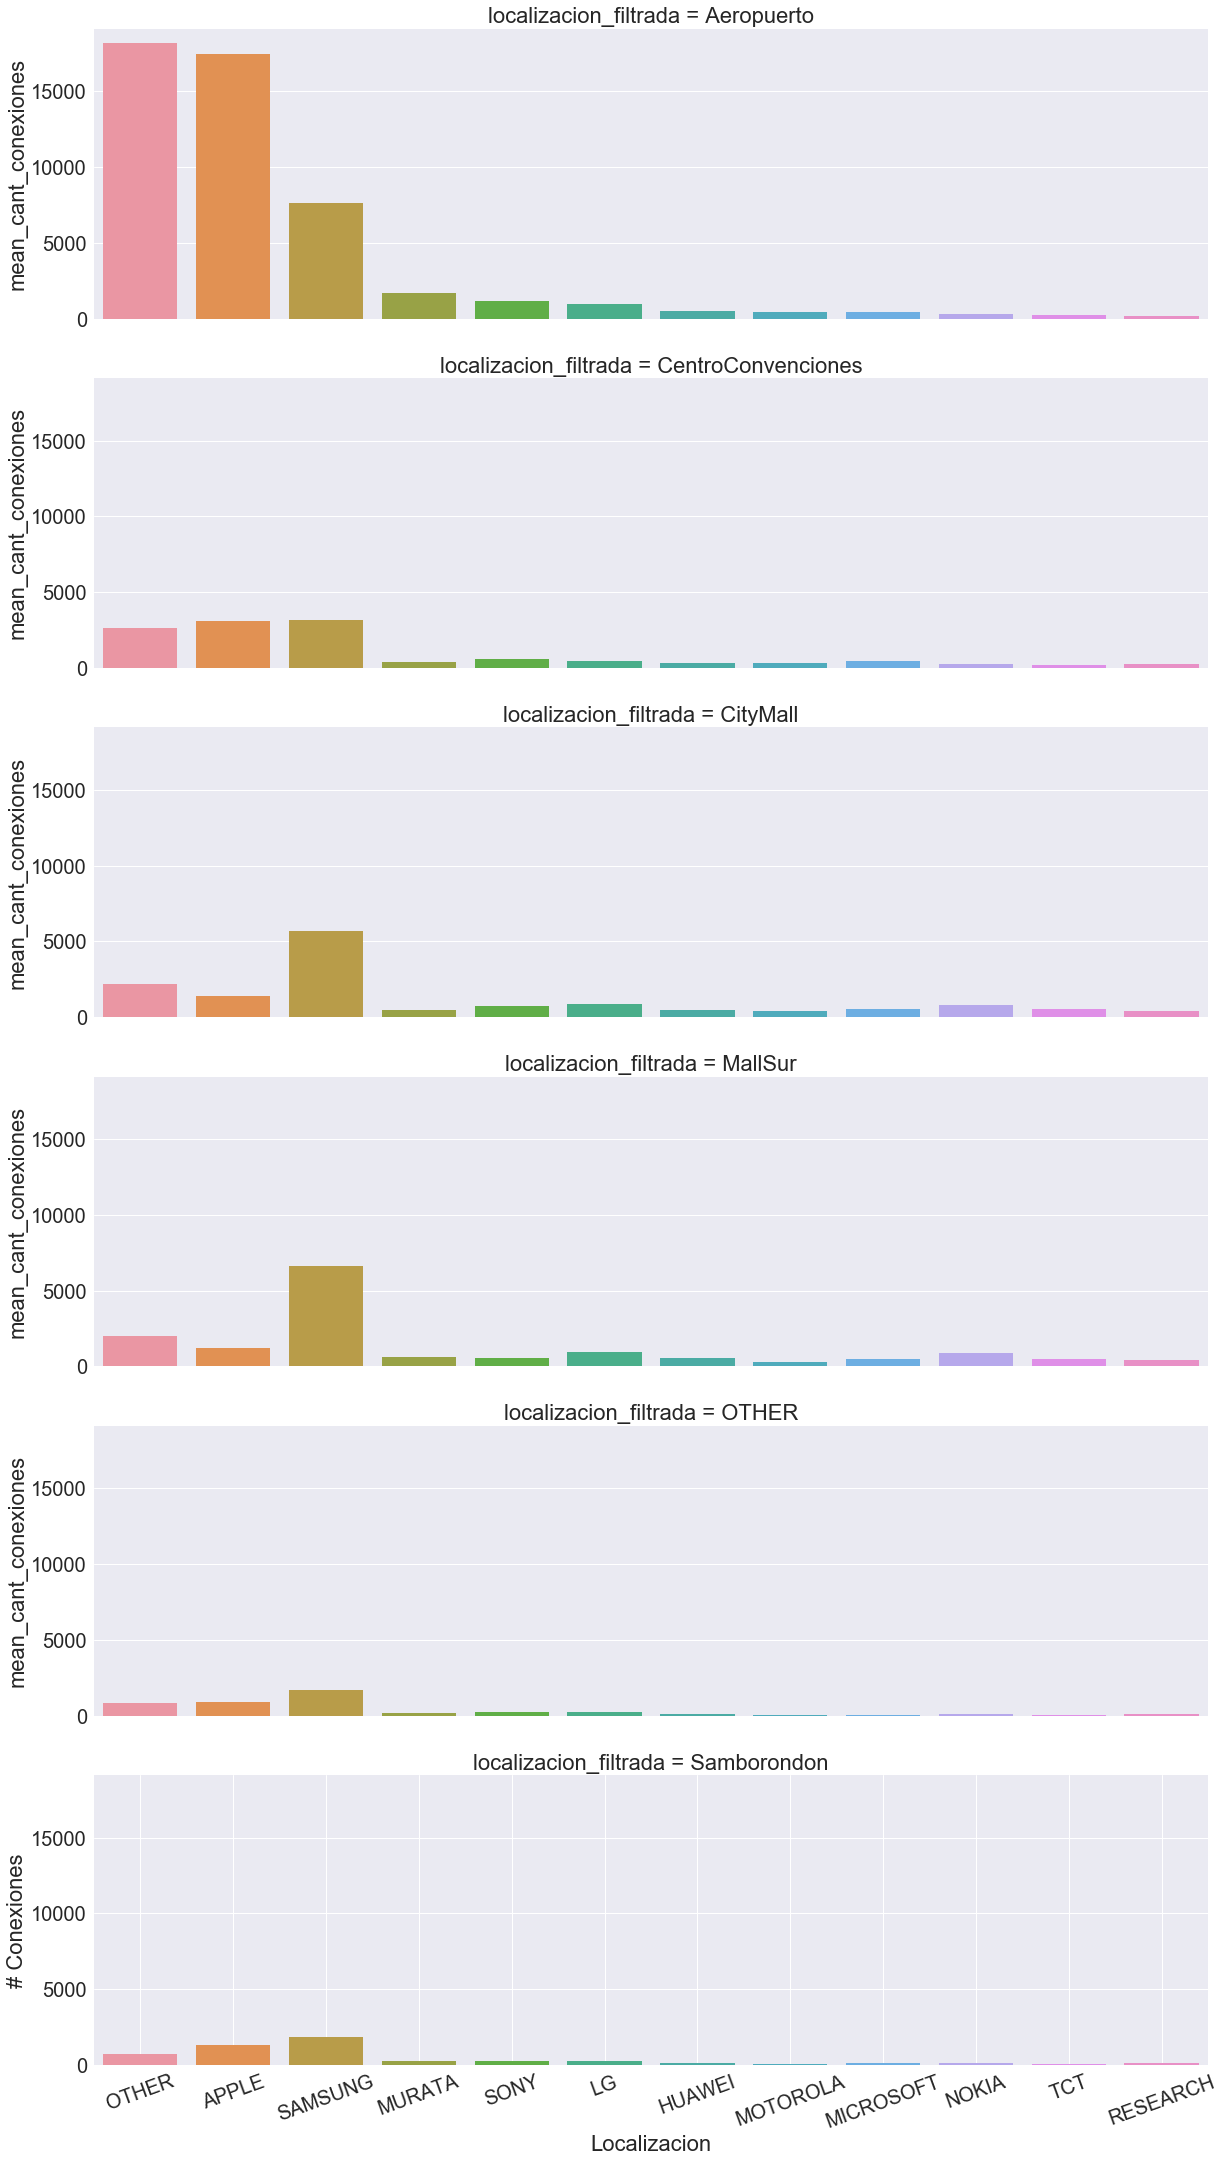

In [50]:
sns.set(font_scale=2)
cm = plt.cm.get_cmap('RdYlBu_r')
g = sns.factorplot(x="fab2", y="mean_cant_conexiones", data=dataAnalisis2FabLocalizacion, size=5, aspect=3.5, kind = "bar", row = "localizacion_filtrada")
plt.xticks(rotation=20)
plt.xlabel("Localizacion")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.show()

# Categorizando a los usuarios en base a que tanto frecuentan las localizaciones en un mes

In [51]:
dataAnalisis3 = datos.copy()[["fecha", "localizacion", "mac_usr"]]
dataAnalisis3["mes"] = dataAnalisis3["fecha"].apply(lambda x: sacarMes(x))
dataAnalisis3["localizacion_filtrada"] = dataAnalisis3["localizacion"].apply(lambda x: FiltrarLugares(top5, x))
dataAnalisis3.head(3)

,fecha,localizacion,mac_usr,mes,localizacion_filtrada
0,2015-05-15,Samborondon,94:01:C2:97:96:CB,2015-05,Samborondon
1,2015-05-15,Samborondon,8C:BF:A6:17:60:A0,2015-05,Samborondon
2,2015-05-15,Samborondon,34:BE:00:05:16:18,2015-05,Samborondon


In [52]:
dataAnalisis3 = dataAnalisis3.groupby(["mes", "localizacion_filtrada", "mac_usr"]).size().rename("cant_conexiones").reset_index()
dataAnalisis3 = dataAnalisis3.groupby(["mac_usr","localizacion_filtrada"]).mean().add_prefix("mean_").reset_index()
dataAnalisis3 =dataAnalisis3.sort_values("mean_cant_conexiones", ascending = False)
dataAnalisis3

,mac_usr,localizacion_filtrada,mean_cant_conexiones
6787,00:14:D1:5C:98:CD,Aeropuerto,374.000000
231529,D0:92:9E:0F:27:14,Aeropuerto,261.666667
56366,2C:D0:5A:72:6D:AA,Aeropuerto,222.400000
5628,00:0C:E7:80:B9:97,Aeropuerto,217.500000
74630,3C:D0:F8:61:11:09,Aeropuerto,177.000000
48838,24:E3:14:85:4D:79,Aeropuerto,171.500000
163360,90:94:E4:0A:4B:E6,Aeropuerto,169.500000
80091,40:F3:08:37:4B:DB,Samborondon,162.666667
237694,D8:EB:97:23:BE:30,Aeropuerto,154.500000
217826,C8:14:79:A7:85:EF,MallSur,141.500000


In [53]:
dataAnalisis3B = dataAnalisis3.pivot(index='mac_usr', columns='localizacion_filtrada', values='mean_cant_conexiones')
dataAnalisis3B = dataAnalisis3B.fillna(0).reset_index()
columnas =list(dataAnalisis3B)
columnas.remove("mac_usr")
dataAnalisis3B['total'] = dataAnalisis3B[columnas].sum(axis=1)
columnasNueva = ["total"]
for c in columnas:
    columnasNueva += [c]
    dataAnalisis3B[c] =(dataAnalisis3B[c]*100)/dataAnalisis3B["total"]
dataAnalisis3B = pd.melt(dataAnalisis3B, id_vars=["mac_usr", "total"], var_name='localizacion', value_name='%Frecuencia')
#dataAnalisis3B.sort_values("total", ascending = False)
dataAnalisis3B.sort_values("mac_usr")

,mac_usr,total,localizacion,%Frecuencia
0,00:00:00:00:90:DC,6.4,Aeropuerto,0.0
1039376,00:00:00:00:90:DC,6.4,OTHER,0.0
1299220,00:00:00:00:90:DC,6.4,Samborondon,100.0
519688,00:00:00:00:90:DC,6.4,CityMall,0.0
259844,00:00:00:00:90:DC,6.4,CentroConvenciones,0.0
779532,00:00:00:00:90:DC,6.4,MallSur,0.0
519689,00:00:02:99:6F:E8,2.0,CityMall,0.0
779533,00:00:02:99:6F:E8,2.0,MallSur,0.0
259845,00:00:02:99:6F:E8,2.0,CentroConvenciones,0.0
1299221,00:00:02:99:6F:E8,2.0,Samborondon,0.0


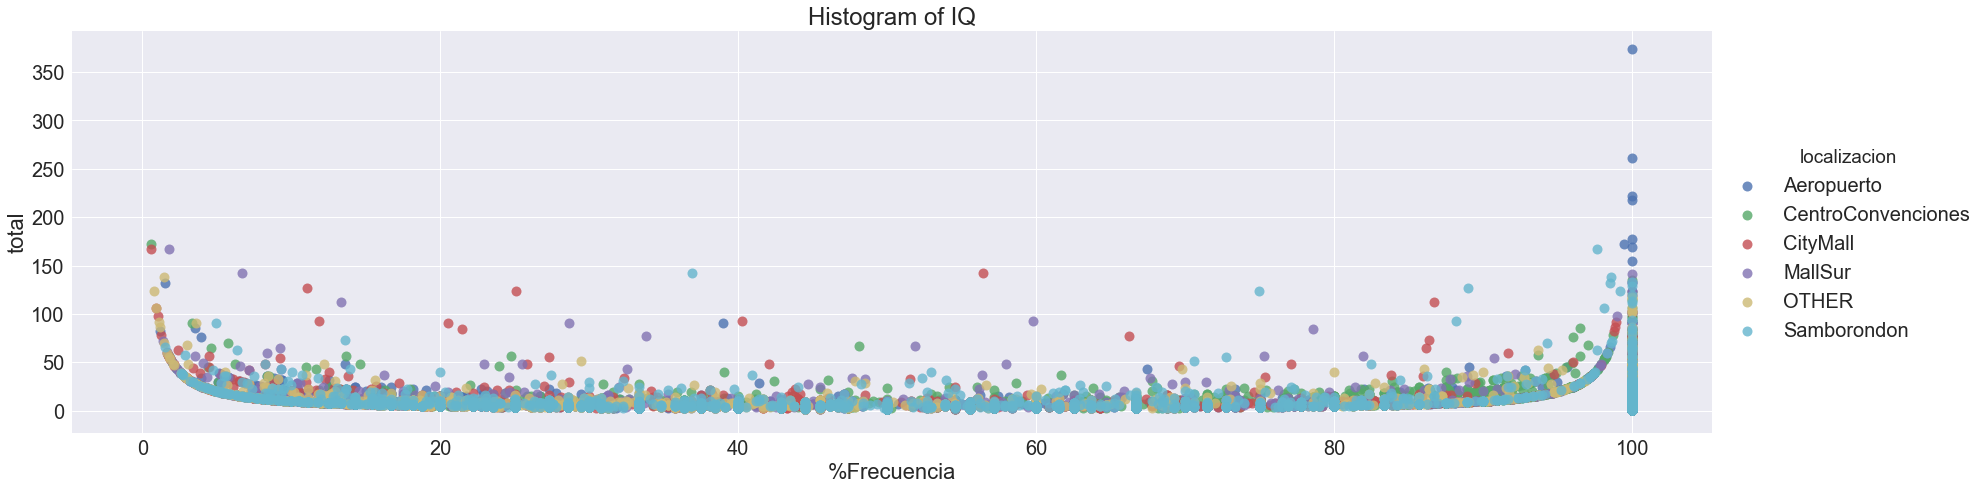

In [54]:
dataAnalisis3BF = dataAnalisis3B[dataAnalisis3B["%Frecuencia"] >0]
sns.lmplot('%Frecuencia', 'total',
           data=dataAnalisis3BF,
           fit_reg=False,  
           scatter_kws={"marker": "D",
                        "s": 100},size=7,aspect=3.5, hue = "localizacion")
plt.title('Histogram of IQ')
plt.xlabel('%Frecuencia')
plt.ylabel('total')
plt.show()

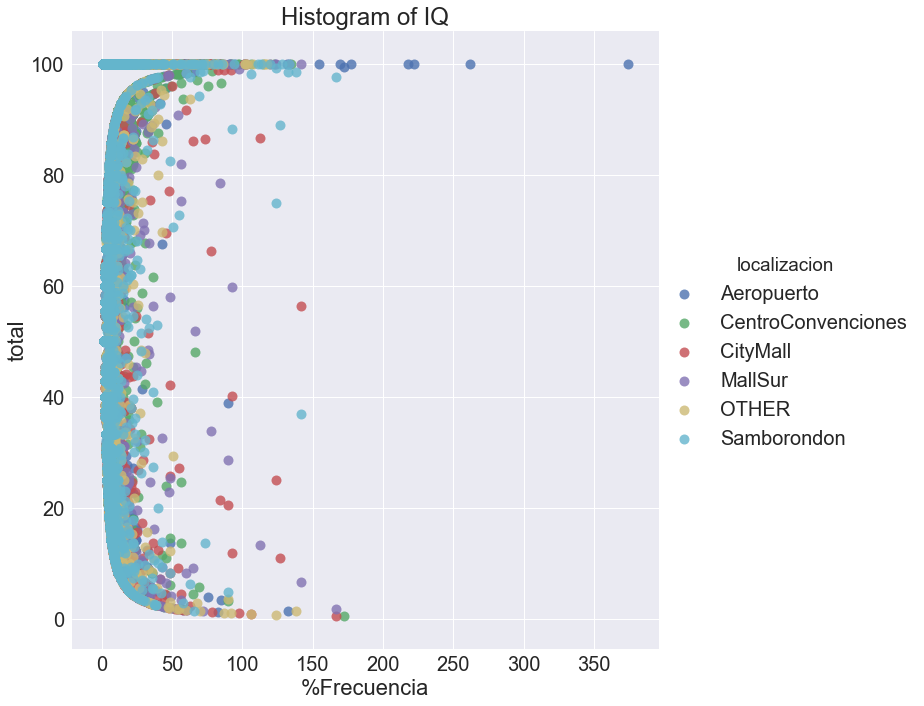

In [55]:
dataAnalisis3BF = dataAnalisis3B[dataAnalisis3B["%Frecuencia"] >0]
sns.lmplot(y='%Frecuencia', x='total',
           data=dataAnalisis3BF,
           fit_reg=False,  
           scatter_kws={"marker": "D",
                        "s": 100},size=10, hue = "localizacion")
plt.title('Histogram of IQ')
plt.xlabel('%Frecuencia')
plt.ylabel('total')
plt.show()

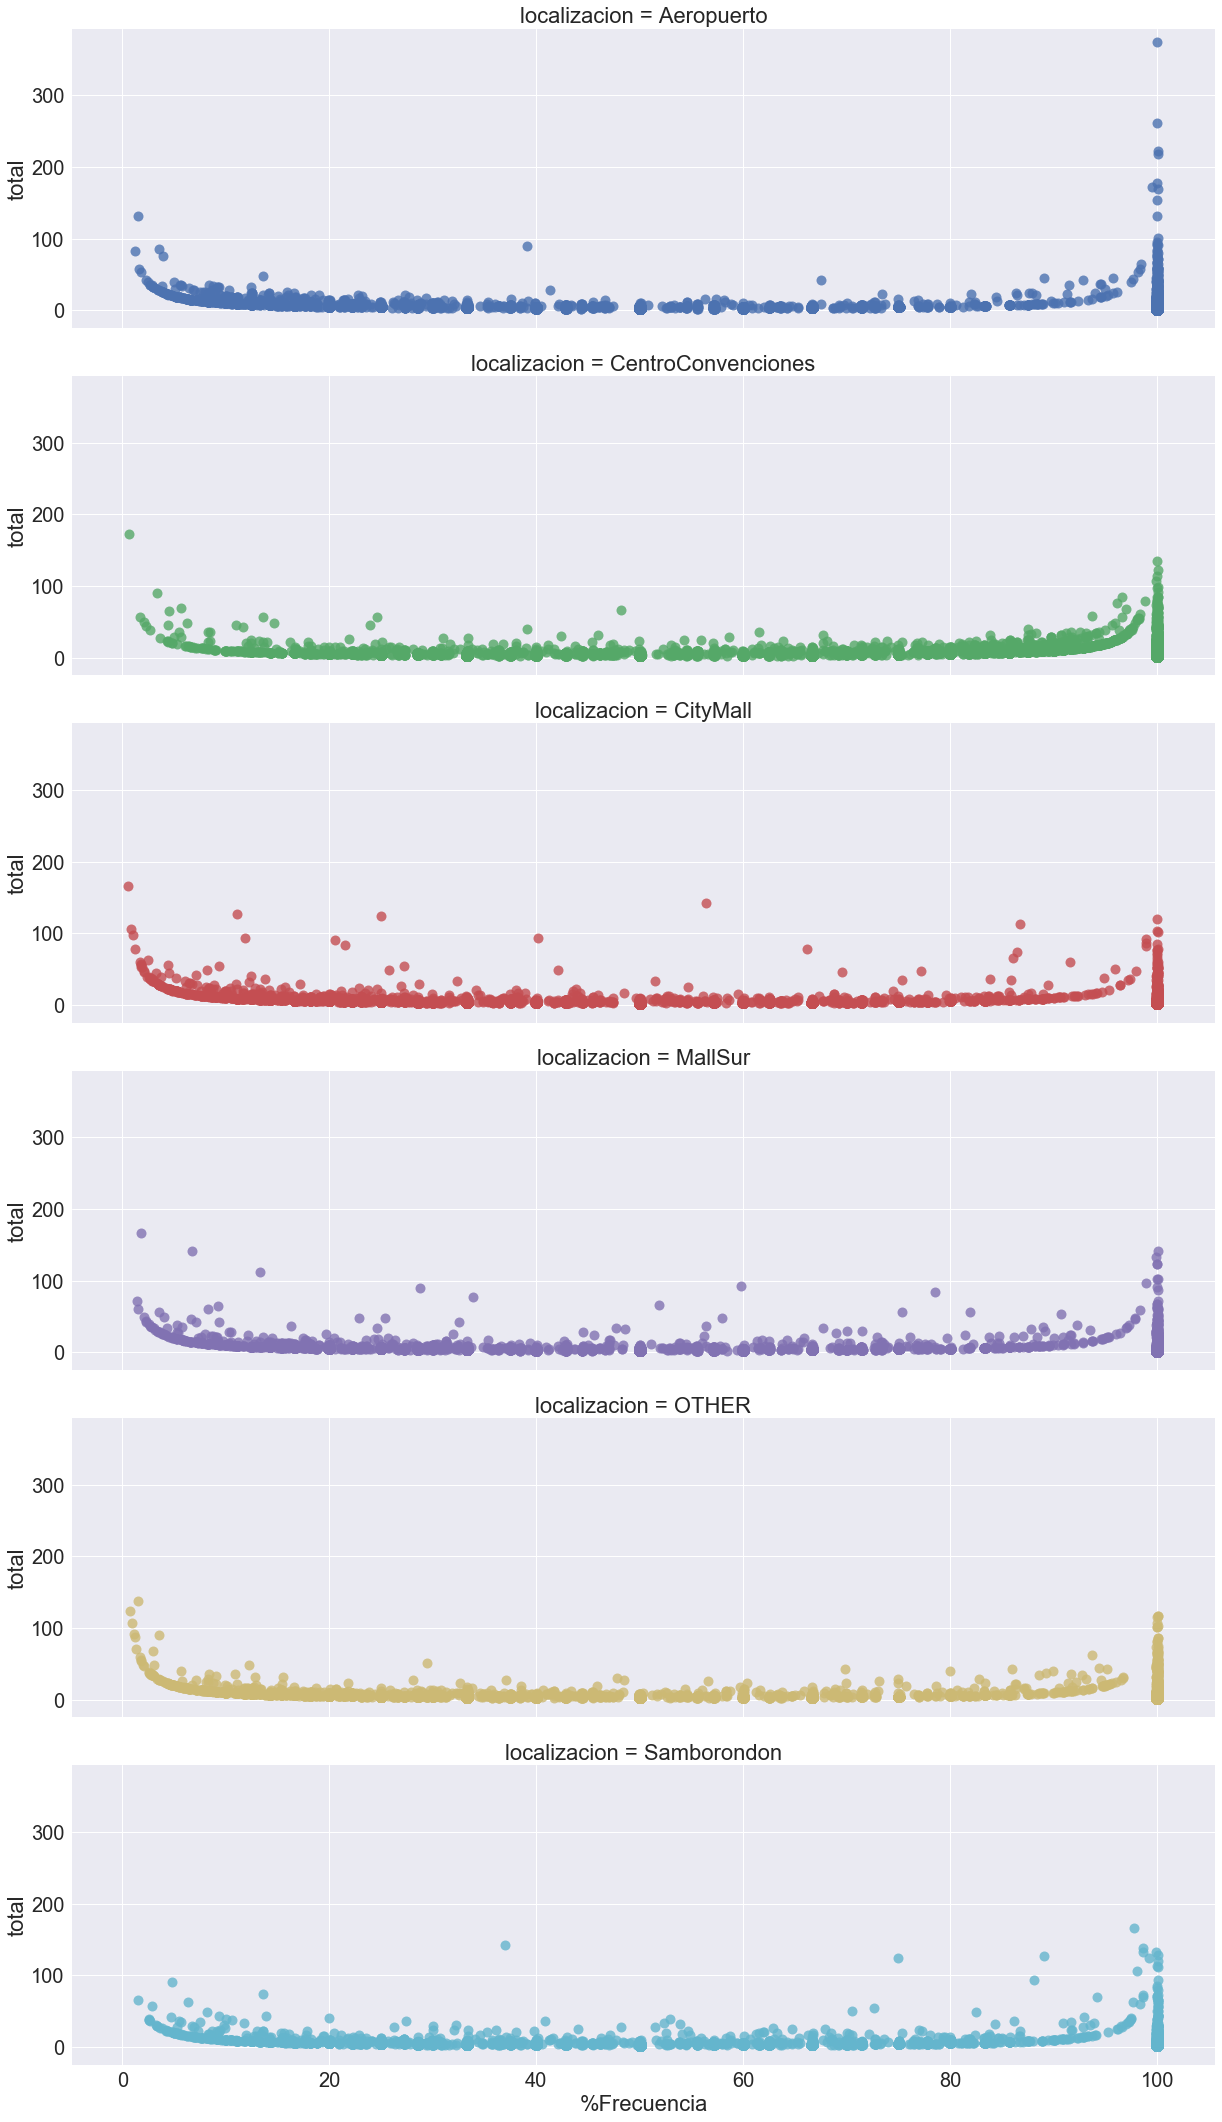

In [56]:
dataAnalisis3BF = dataAnalisis3B[dataAnalisis3B["%Frecuencia"] >0]
sns.lmplot('%Frecuencia', 'total',
           data=dataAnalisis3BF,
           fit_reg=False,  
           scatter_kws={"marker": "D",
                        "s": 100},size=5, aspect=3.5, hue = "localizacion",row = "localizacion", x_jitter=.1)
plt.show()